# Example data notebook

Content in this page can be created by using Jupyter Notebooks. This means that you can write content very easily, embed images, HTML, etc into your posts!

<div style="text-align:center">
<img src="https://live.staticflickr.com/65535/48992224646_bd32af64ae_k.jpg" width=100%>
</div>

```{seealso}
Check the documentation on the syntax in [here](https://jupyterbook.org/en/stable/content/index.html).
```

## Writing content

The idea for this file is to serve as a data analysis recipe to reproduce your analysis. With both, code, outputs, and data, we can ensure that the findings are actually FAIR.
Let's look at some examples!

## Load data, plot, process, and export
This example will load data from the SmartCitizen API, do some plots, and export it in CSV format

In [1]:
# Import the Test data structure
from scdata import Test

Found Environment file at: /Users/macoscar/.cache/scdata/.env


We can set the framework to output verbose information, and set the rendering framework as jupyterlab

In [2]:
from scdata._config import config

# Output levels:
# 'QUIET': nothing, 
# 'NORMAL': warn, err
# 'DEBUG': info, warn, err, success
config._out_level='NORMAL' 

# This defaults to script'. If using it in jupyterlab, sets the plot renderers accordingly
config._framework='jupyterlab'

We can put the data in a test. A test is simply a handy way to group devices and process them

In [3]:
test = Test('EXAMPLE_MINKE')

[2022-11-30 21:30:29] - [INFO] Possible tests found
[2022-11-30 21:30:29] - [INFO] 4 --- 2022_05_EXAMPLE_MINKE
[2022-11-30 21:30:29] - [INFO] 11 --- 2022_11_EXAMPLE_MINKE_DEMO
[2022-11-30 21:30:29] - [INFO] // --- \\


Similar tests found, please select one or input other name [New]:  11


[2022-11-30 21:30:34] - [INFO] Test full name, 2022_11_EXAMPLE_MINKE_DEMO


Before adding devices to the test, we import the Device object:

In [4]:
from scdata import Device

### Load SC API data

In [5]:
# Add as many devices as needed. See understanding blueprints below for more info
test.add_device(Device(blueprint = 'sc_21_station_module', descriptor = {'source': 'api', 
                                                                         'id': '14638',
                                                                         'min_date': '2021-10-15',
                                                                         'max_date': '2021-10-30'
                                                             }
                         )
               )

[2022-11-30 21:30:40] - [SUCCESS] Device 14638 initialised


In [6]:
# Add as many devices as needed. See understanding blueprints below for more info
test.add_device(Device(blueprint = 'sck_21', descriptor = {'source': 'api', 
                                                                         'id': '14735', 
                                                                         'max_date': '2022-02-15',
                                                             }
                         )
               )

[2022-11-30 21:30:43] - [SUCCESS] Hardware described in url is valid
[2022-11-30 21:30:43] - [WARNING] Skipping blueprint as it was defined in device constructor
[2022-11-30 21:30:43] - [SUCCESS] Device 14735 initialised


The blueprint urls can be found at `~/.config/scdata/config.yaml` or here in:


In [7]:
config.blueprints

{'base': {'clean_na': None,
  'documentation': None,
  'post_info': None,
  'frequency': None,
  'id': None,
  'timezone': None,
  'max_date': None,
  'min_date': None,
  'source': None,
  'version': None},
 'csic_station': {'clean_na': None,
  'documentation': 'https://analisi.transparenciacatalunya.cat/',
  'frequency': None,
  'id': None,
  'timezone': None,
  'max_date': None,
  'min_date': None,
  'processed_data_file': None,
  'raw_data_file': None,
  'sensors': {'C6H6': {'id': 'C6H6', 'units': 'ug/m3'},
   'CO': {'id': 'CO', 'units': 'mg/m3'},
   'H2S': {'id': 'H2S', 'units': 'ug/m3'},
   'NO': {'id': 'NO', 'units': 'ug/m3'},
   'NO2': {'id': 'NO2', 'units': 'ug/m3'},
   'NOX': {'id': 'NOX', 'units': 'ug/m3'},
   'O3': {'id': 'O3', 'units': 'ug/m3'},
   'PM_10': {'id': 'PM10', 'units': 'ug/m3'},
   'PM_1': {'id': 'PM1', 'units': 'ug/m3'},
   'PM_25': {'id': 'PM2.5', 'units': 'ug/m3'},
   'SO2': {'id': 'SO2', 'units': 'ug/m3'}},
  'source': None,
  'sources': {'api': {'handler': 

In [ ]:
config.blueprints.keys()

This is how you can add a csv device (from sdcard data or other). The raw data file is to be put in `~/.cache/scdata/raw`:

### Load SD Card Data

In [8]:
test.add_device(Device(blueprint = 'sck_21' , descriptor = {'source': 'csv',
                                                                  'id': 'csv_device',
                                                                  'raw_data_file': 'example.csv',
                                                                  'frequency': '1Min',
                                                                  'timezone': 'Europe/Madrid'
                                                         }
                     )
           )

[2022-11-30 21:30:58] - [SUCCESS] Device csv_device initialised


This instruction will create the test folder structure, the description and anything needed to keep track of the data:

In [ ]:
# Create the test
test.create()

In [9]:
# Load it
test.load()

[2022-11-30 21:31:15] - [SUCCESS] Device 14638 initialised
[2022-11-30 21:31:15] - [SUCCESS] Device csv_device initialised
[2022-11-30 21:31:17] - [WARNING] Removing sensors from device: ['ADC_48_0', 'ADC_48_1', 'ADC_48_2', 'ADC_48_3', 'ADC_49_0', 'ADC_49_1', 'ADC_49_2', 'ADC_49_3', 'ADC_4A_0', 'ADC_4A_1', 'ADC_4A_2', 'ADC_4A_3', 'ADC_4B_0', 'ADC_4B_1', 'ADC_4B_2', 'ADC_4B_3', 'EXT_PM_A_1', 'EXT_PM_A_10', 'EXT_PM_A_25', 'EXT_PM_B_1', 'EXT_PM_B_10', 'EXT_PM_B_25', 'PM_1', 'PM_10', 'PM_25', 'EXT_SHT31_HUM', 'EXT_SHT31_TEMP', 'PM_DALLAS_TEMP', 'GPS_LAT', 'GPS_LONG', 'SCD30_TEMP', 'SCD30_HUM', 'SCD30_CO2']
[2022-11-30 21:31:17] - [SUCCESS] Loaded cached files
[2022-11-30 21:31:17] - [SUCCESS] Device 14638 has been loaded
[2022-11-30 21:31:17] - [WARNING] No cached data file found for device 14735 in /Users/macoscar/.cache/scdata/processed/2022/11/2022_11_EXAMPLE_MINKE_DEMO/cached. Moving on
[2022-11-30 21:31:17] - [WARNING] No valid cached data. Requesting device 14735 to API
[2022-11-30 2

In [10]:
# Check the devices
test.devices

{'14638': <scdata.device.Device at 0x10c0f8100>,
 '14735': <scdata.device.Device at 0x131bcec10>,
 'csv_device': <scdata.device.Device at 0x10c0f81c0>}

In [11]:
# Check the data
test.devices['14638'].readings

,BATT,CCS811_ECO2,CCS811_VOCS,HUM,LIGHT,NOISE_A,PRESS,TEMP
TIME,,,,,,,,
2021-10-19 11:28:00-05:00,-1.0,400.0,0.0,61.33,143.0,87.02,84.93,24.08
2021-10-19 11:29:00-05:00,-1.0,400.0,0.0,61.14,105.0,81.60,84.94,24.17
2021-10-19 11:30:00-05:00,-1.0,400.0,0.0,60.34,89.0,81.91,84.93,24.31
2021-10-19 11:31:00-05:00,-1.0,400.0,0.0,59.11,114.0,79.34,84.92,24.45
2021-10-19 11:32:00-05:00,-1.0,400.0,0.0,59.20,113.0,85.20,84.93,24.58
...,...,...,...,...,...,...,...,...
2021-12-21 00:08:00-06:00,-1.0,1790.0,439.0,66.56,0.0,75.36,84.88,13.27
2021-12-21 00:09:00-06:00,-1.0,1782.0,429.0,66.64,0.0,76.68,84.88,13.22
2021-12-21 00:10:00-06:00,-1.0,1784.0,432.0,66.86,0.0,70.32,84.88,13.14


## Plotting data

There are many options for plotting data. Here you can find some basic timeseries examples:

<Figure size 432x288 with 0 Axes>

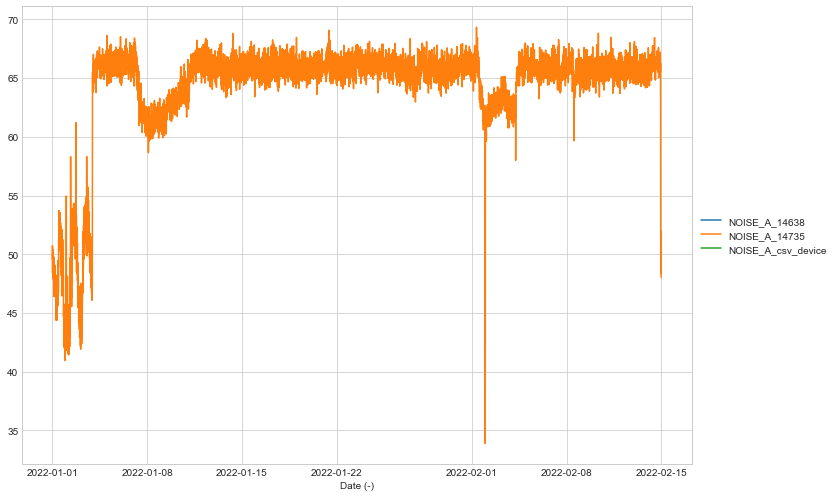

In [12]:
traces = {
            "1": {"devices": "all",
                  "channel": "NOISE_A",
                  "subplot": 1},
        }

figure = test.ts_plot(traces = traces, 
                      options = {'frequency': '10Min', 'min_date': '2022-01'})

In [16]:
traces = {
            "1": {"devices": '14735',
                  "channel": "TEMP",
                  "subplot": 1},
            "2": {"devices": '14735',
                  "channel": "NOISE_A",
                  "subplot": 2},
        }

height = 300

f = test.ts_uplot(traces = traces, 
              formatting = {'width': height*2.5, 
                            'height': height, 
                            'padding-bottom': height,
                            'title': 'Temperature', 
                            'ylabel': {1: 'Temperature (degC)',
                                       2: 'Noise (dBA)'}
                           }, 
              options = {'frequency': '10Min', 'html': False});


/Users/macoscar/.virtualenvs/scdata/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
f

```{seealso}
For more examples, visit: https://github.com/fablabbcn/smartcitizen-data/blob/master/examples/notebooks/03_data_visualisation.ipynb
```